In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 读取文件
final1 = np.loadtxt(fname="PM200.out",  delimiter=",")
final2 = np.loadtxt(fname="PM300.out",  delimiter=",")
final3 = np.loadtxt(fname="PM270.out",  delimiter=",")
final4 = np.loadtxt(fname="PM330.out",  delimiter=",")
final5 = np.loadtxt(fname="PM400.out",  delimiter=",")
final6 = np.loadtxt(fname="PM450.out",  delimiter=",")
final7 = np.loadtxt(fname="PM500.out",  delimiter=",")

In [3]:
final8 = np.loadtxt(fname="PM499.out",  delimiter=",")

In [4]:
# 读取文件330-340
finalmore2 = np.loadtxt(fname="PM338-340.out",  delimiter=",")
finalmore1 = np.loadtxt(fname="PM330-336.out",  delimiter=",")
finalmore3 = np.loadtxt(fname="PM337.out",  delimiter=",")
finalmore4 = np.loadtxt(fname="PM337.out",  delimiter=",")

In [5]:
finalmore2 = finalmore2[:24]
finalmore1 = finalmore1[:72]
finalmore3 = finalmore3[:12]
finalmore4 = finalmore4[:12]

In [6]:
xxx1 = np.hstack((finalmore1,finalmore2))
xxx2 = np.hstack((xxx1,finalmore3))
xxx3 = np.hstack((xxx2,finalmore4))


In [7]:
final2 = final2[:840]

In [8]:
d = np.hstack((final1,final2))

In [9]:
dd = np.hstack((d,final3))

In [10]:
d4 = np.hstack((dd,final4))

In [11]:
#mid = np.zeros((120))
#mid[mid == 0]=np.nan
mid = xxx3

In [12]:
finalmore2.shape

(24,)

In [13]:
d5 = np.hstack((d4,mid))

In [14]:
d6 = np.hstack((d5,final5))

In [15]:
d7 = np.hstack((d6,final6))

In [16]:
final = np.hstack((d7,final7))

In [17]:
final[4188:]=final8[0:12]

In [18]:
final.shape

(4200,)

In [19]:
4200/12

350.0

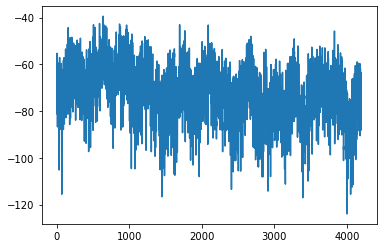

In [20]:
plt.plot(final)

In [21]:
AAA = final[8:4200:12]

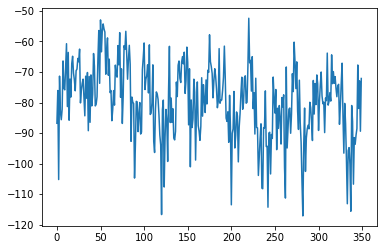

In [22]:
plt.plot(AAA)

In [25]:
ww2 = np.convolve(final, np.ones((60,))/60, mode='valid')

In [26]:
tem = np.load(file="tem.npy")

In [27]:
temm = np.convolve(tem, np.ones((5,))/5, mode='valid')

In [28]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

In [29]:
wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

In [30]:
wspxx.shape

(106,)

In [31]:
list_before = wspxx
list_after = [val for val in list_before for i in range(12)]
xxx = np.reshape(list_after,(106,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [32]:
1608/12

134.0

In [33]:
list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]
mrpxxx = np.reshape(list_after,(216,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [34]:
list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(134,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [35]:
ave = np.nanmean(-ww2)

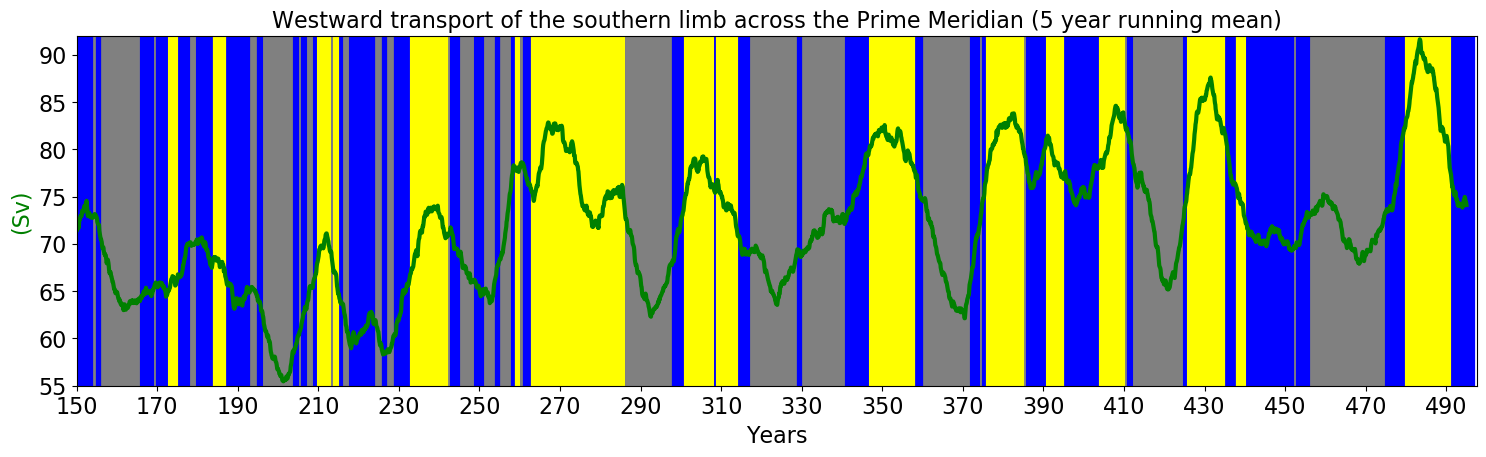

In [37]:
t = np.arange(0,4141,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])

plt.vlines(noxxx, 55, 92, colors = "grey")
plt.vlines(mrpxxx,55, 92, colors = "blue")

plt.vlines(xxx, 55, 92, colors = "yellow")
ax0.plot(-ww2,'g',linewidth=3)
#y = 0.003*t+67
#ax0.plot(t, y, c='orange',linewidth=3)
#ax0.fill_between(t,y,-ww2,where=-ww2<y,facecolor='purple', alpha=1)
#ax0.plot(tem,'red',linewidth=3)
#########################################

#plt.xticks(range(0,4201,600), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(Sv)',color= 'g',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)

ax0.set(ylim=(55, 92),xlim=(0, 4170))
#ax2 = ax0.twinx() 
#ax2.plot(t[:346],temm,'blue',linewidth=2)
#plt.yticks(**my_font)
#plt.ylabel('($^\circ$C) 205m',color= 'blue',**my_font)
#plt.axis("tight")
#plt.ylabel('SAM index',color= 'red',**my_font)

ax0.set_title('Westward transport of the southern limb across the Prime Meridian (5 year running mean)',**my_font)
plt.savefig("PM22.png",bbox_inches='tight',dpi=fig.dpi)

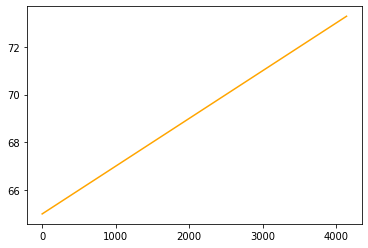

In [55]:
x = np.linspace(0,1, 4141)
y = 0.002*t+65
plt.plot(t, y, c='orange')

In [35]:
cc= -ww2[9::12]

In [36]:
np.savetxt('cc.out',cc)

In [33]:
upup = np.loadtxt("SSS-up.out")

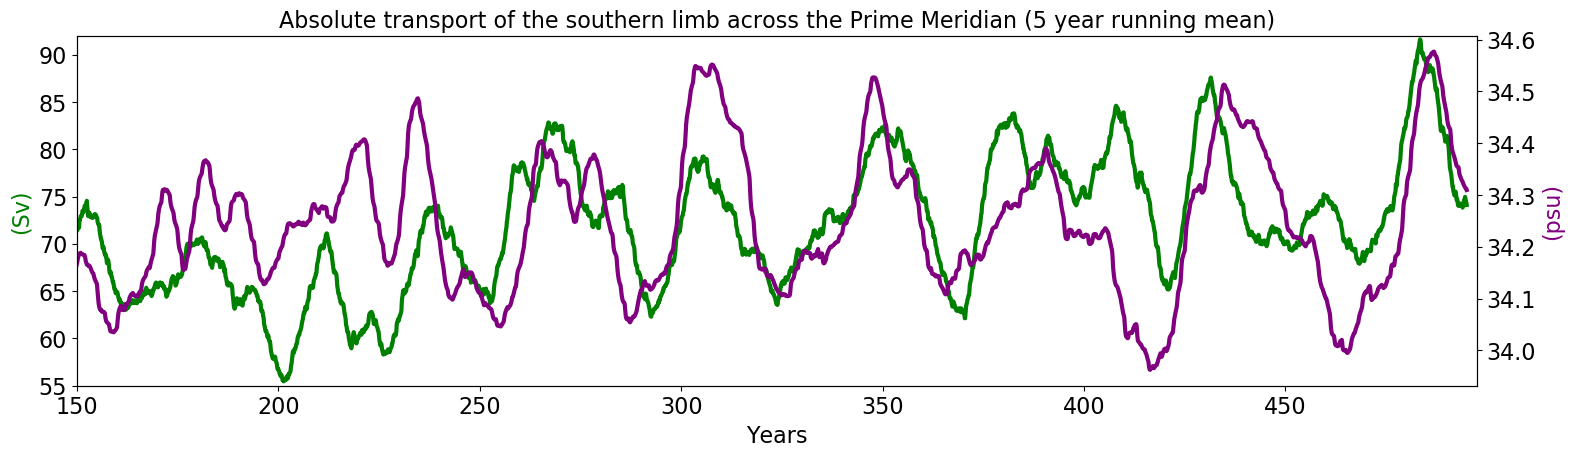

In [45]:
t = np.arange(0,4200,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww2,'g',linewidth=3)
#ax0.plot(upup,'red',linewidth=3)
#########################################

plt.xticks(range(0,4201,600), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(Sv)',color= 'g',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
#plt.vlines(noxxx, 55, 92, colors = "grey")
#plt.vlines(mrpxxx, 55, 92, colors = "blue")
plt.axis("tight")
#plt.vlines(xxx, 55, 92, colors = "yellow")
ax0.set(ylim=(55, 92),xlim=(0, 4170))
ax2 = ax0.twinx() 
ax2.plot(upup,'purple',linewidth=3)
plt.yticks(**my_font)
plt.ylabel('(psu)',color= 'purple',**my_font)

#plt.ylabel('SAM index',color= 'red',**my_font)
ax0.set_title('Absolute transport of the southern limb across the Prime Meridian (5 year running mean)',**my_font)
plt.savefig("PM22.png",bbox_inches='tight',dpi=fig.dpi)

In [33]:
np.savetxt('WG.out',-ww2)

In [34]:
ACCd = np.loadtxt("ACCbest.out")

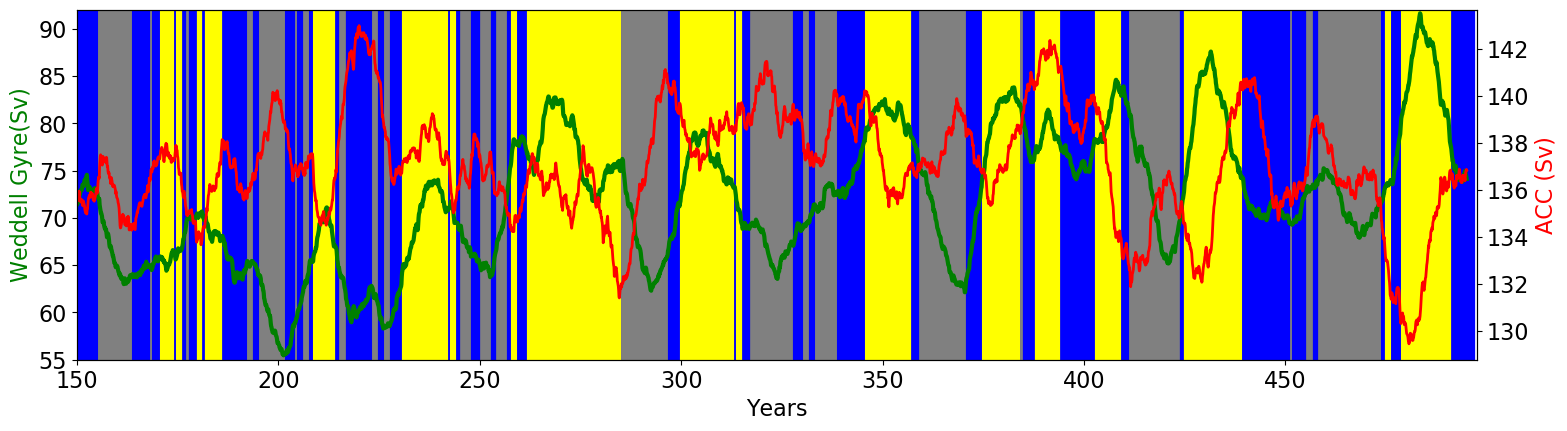

In [36]:
t = np.arange(0,4200,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww2,'g',linewidth=3)
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,4201,600), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Weddell Gyre(Sv)',color= 'g',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
plt.vlines(noxxx, 55, 92, colors = "grey")
plt.vlines(mrpxxx, 55, 92, colors = "blue")
plt.axis("tight")
plt.vlines(xxx, 55, 92, colors = "yellow")
ax0.set(ylim=(55, 92),xlim=(0, 4170))
ax2 = ax0.twinx() 
ax2.plot(ACCd,'r',linewidth=2)
plt.yticks(**my_font)
plt.ylabel('ACC (Sv)',color= 'red',**my_font)

#plt.ylabel('SAM index',color= 'red',**my_font)
#ax0.set_title('Absolute transport of the southern limb across the Prime Meridian (5 year running mean)',**my_font)
plt.savefig("PM22.png",bbox_inches='tight',dpi=fig.dpi)

In [36]:
ACCwest = np.loadtxt("ACCwest.out")

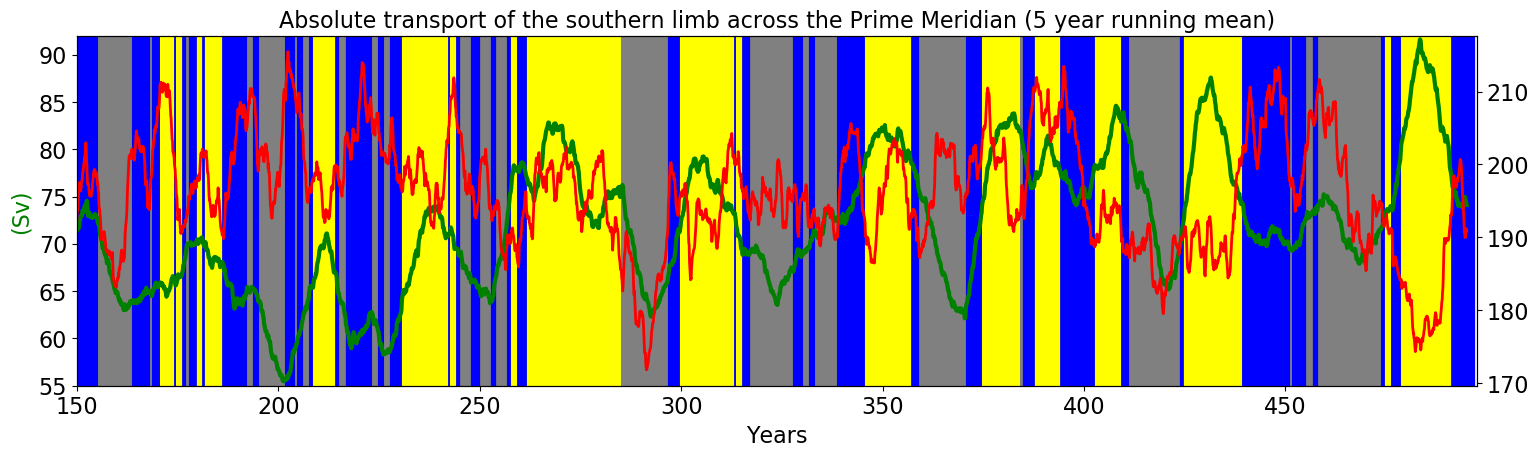

In [37]:
t = np.arange(0,4200,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww2,'g',linewidth=3)
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,4201,600), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(Sv)',color= 'g',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
plt.vlines(noxxx, 55, 92, colors = "grey")
plt.vlines(mrpxxx, 55, 92, colors = "blue")
plt.axis("tight")
plt.vlines(xxx, 55, 92, colors = "yellow")
ax0.set(ylim=(55, 92),xlim=(0, 4170))
ax2 = ax0.twinx() 
ax2.plot(ACCwest,'r',linewidth=2)
plt.yticks(**my_font)
#plt.ylabel('($^\circ$C) 205m',color= 'blue',**my_font)

#plt.ylabel('SAM index',color= 'red',**my_font)
ax0.set_title('Absolute transport of the southern limb across the Prime Meridian (5 year running mean)',**my_font)
plt.savefig("PM33.png",bbox_inches='tight',dpi=fig.dpi)

In [41]:
uppxx = np.loadtxt("uppxx.out")
#uppxx = uppxx*12

In [42]:
list_before = uppxx
list_after = [val for val in list_before for i in range(12)]
xxxup = np.reshape(list_after,(125,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [43]:
upmean1 = np.loadtxt("upmean.out")


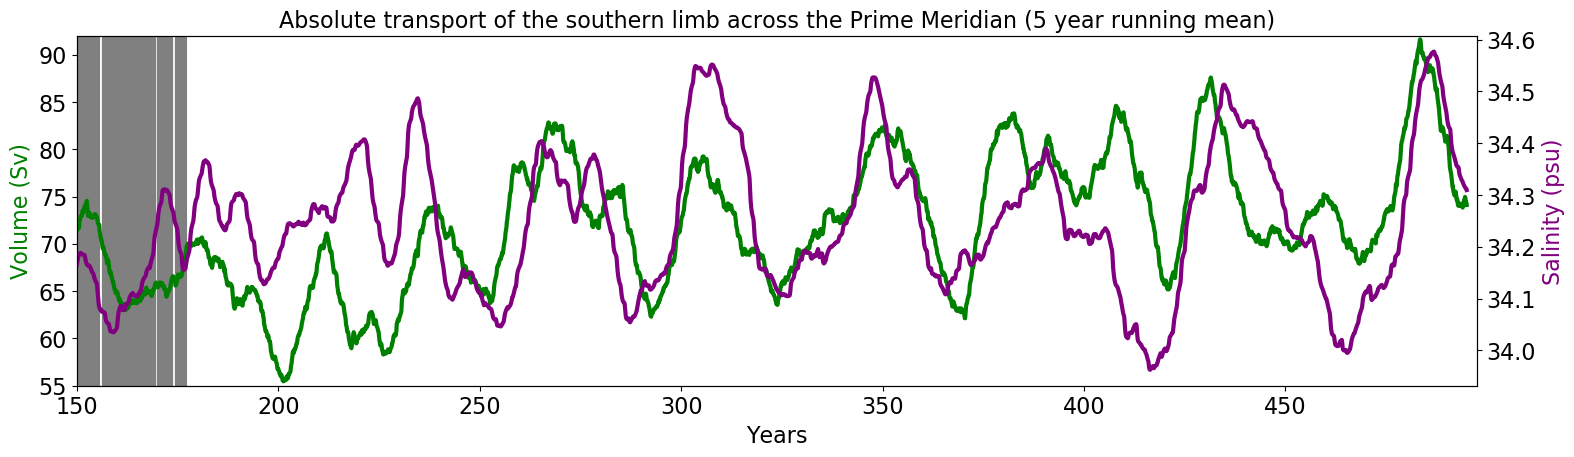

In [44]:
t = np.arange(0,4200,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww2,'g',linewidth=3)
#ax0.plot(upmean,'red',linewidth=3)
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,4201,600), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Volume (Sv)',color= 'g',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
#plt.vlines(noxxx, 55, 92, colors = "grey")
#plt.vlines(mrpxxx, 55, 92, colors = "blue")
plt.axis("tight")
plt.vlines(xxxup, 55, 92, colors = "grey")
ax0.set(ylim=(55, 92),xlim=(0, 4170))
ax2 = ax0.twinx() 
ax2.plot(upup,'purple',linewidth=3)
#ax2.plot(t[:346],temm,'blue',linewidth=2)
plt.yticks(**my_font)
plt.ylabel('Salinity (psu)',color= 'purple',**my_font)

#plt.ylabel('SAM index',color= 'red',**my_font)
ax0.set_title('Absolute transport of the southern limb across the Prime Meridian (5 year running mean)',**my_font)
plt.savefig("PMtry.png",bbox_inches='tight',dpi=fig.dpi)

Text(0.5, 1.0, 'Absolute transport of the southern limb across the Prime Meridian (5 year running mean)')

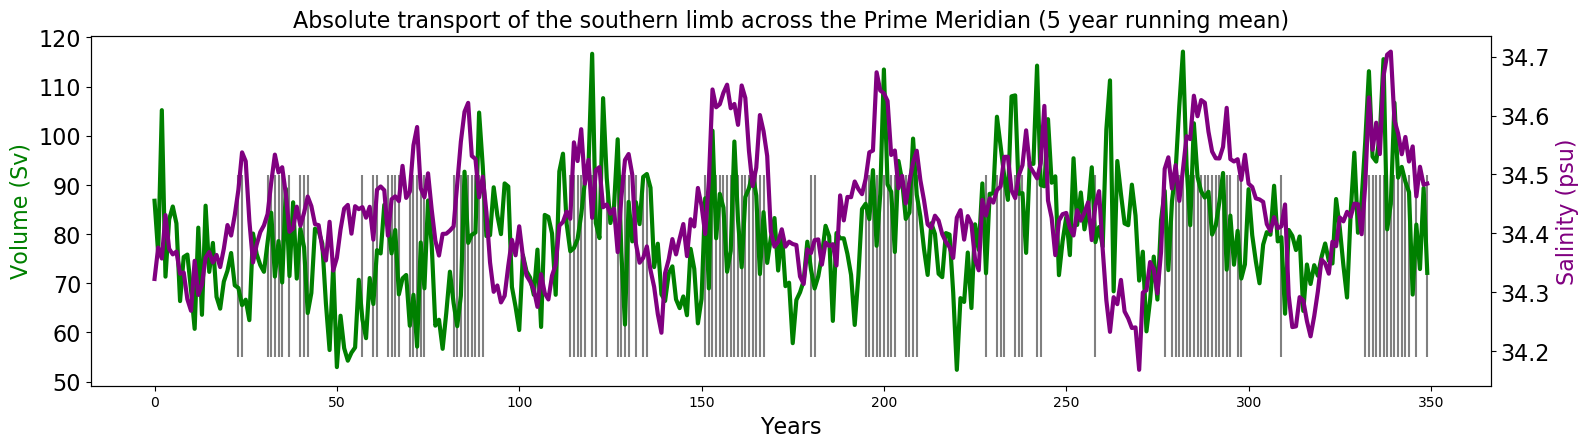

In [34]:
#t = np.arange(0,4200,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-AAA,'g',linewidth=3)
#ax0.plot(upmean,'red',linewidth=3)
#ax0.plot(tem,'red',linewidth=3)
#########################################

#plt.xticks(range(0,4201,600), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Volume (Sv)',color= 'g',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
#plt.vlines(noxxx, 55, 92, colors = "grey")
#plt.vlines(mrpxxx, 55, 92, colors = "blue")
plt.axis("tight")
plt.vlines(uppxx, 55, 92, colors = "grey")
#ax0.set(ylim=(55, 92),xlim=(0, 4170))
ax2 = ax0.twinx() 
ax2.plot(upmean1,'purple',linewidth=3)
#ax2.plot(t[:346],temm,'blue',linewidth=2)
plt.yticks(**my_font)
plt.ylabel('Salinity (psu)',color= 'purple',**my_font)

#plt.ylabel('SAM index',color= 'red',**my_font)
ax0.set_title('Absolute transport of the southern limb across the Prime Meridian (5 year running mean)',**my_font)
#plt.savefig("PMtry.png",bbox_inches='tight',dpi=fig.dpi)

In [35]:
np.savetxt('lalasv.out',-AAA)

In [ ]:
np.savetxt('ACCd.out',ww2new2)

In [24]:
sal = np.load(file="sal.npy")

In [25]:
salm = np.convolve(sal, np.ones((5,))/5, mode='valid')

In [26]:
salm.shape

(346,)

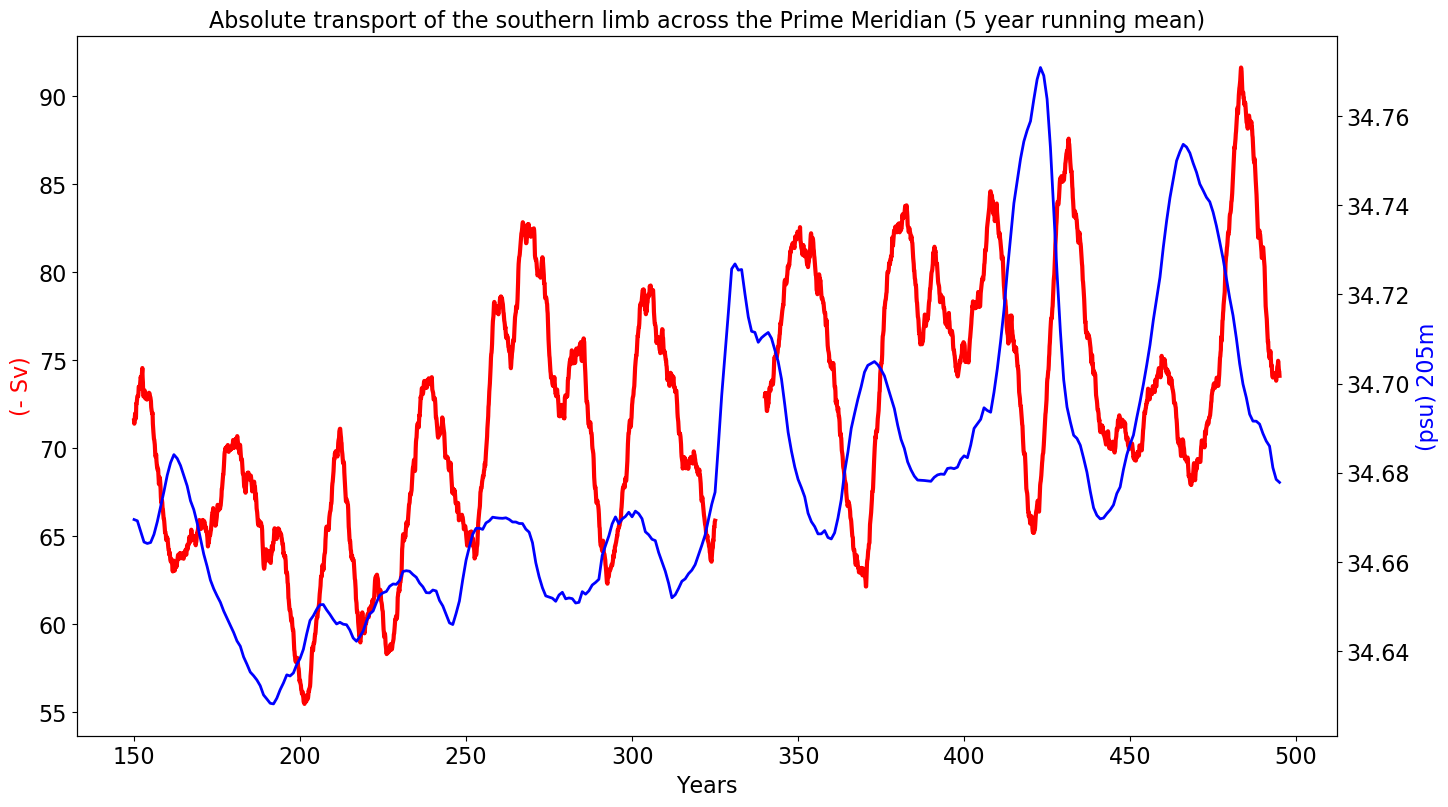

In [27]:
t = np.arange(0,4200,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(18,10), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww2,'red',linewidth=3)
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,4201,600), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(- Sv)',color= 'red',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)

ax2 = ax0.twinx() 
ax2.plot(t[:346],salm,'blue',linewidth=2)
plt.yticks(**my_font)
plt.ylabel('(psu) 205m',color= 'blue',**my_font)
plt.axis("tight")
#plt.ylabel('SAM index',color= 'red',**my_font)
ax0.set_title('Absolute transport of the southern limb across the Prime Meridian (5 year running mean)',**my_font)
plt.savefig("PMsal205.png",bbox_inches='tight',dpi=fig.dpi)

In [28]:
sal.shape

(350,)